--- Problem 1: Lake Temperature and Thermocline Analysis ---

Discussion for Problem 1:
This problem focuses on interpolating lake temperature data at various depths to understand thermal characteristics like the thermocline. Numerical methods such as Lagrange polynomials and quadratic splines are employed for this purpose.
The thermocline, characterized by a sudden temperature change, is identified where the second derivative of temperature with respect to depth is zero.

(a) Temperature at z = -7.5 m using third-order Lagrange polynomial: 14.7250 C
Absolute relative approximate error for the third-order Lagrange polynomial (compared to 2nd order): 3.9898%

(b) Depth at which the thermocline exists (d^2T/dz^2 = 0) using the third-order Lagrange polynomial: -7.5638 m

(c) Temperature values using quadratic splines:
Temperature at z = -7.1 m: 17.1623 C
Temperature at z = -7.2 m: 16.6560 C
Temperature at z = -7.3 m: 16.0810 C
Temperature at z = -7.4 m: 15.4373 C
Temperature at z = -7.5 m

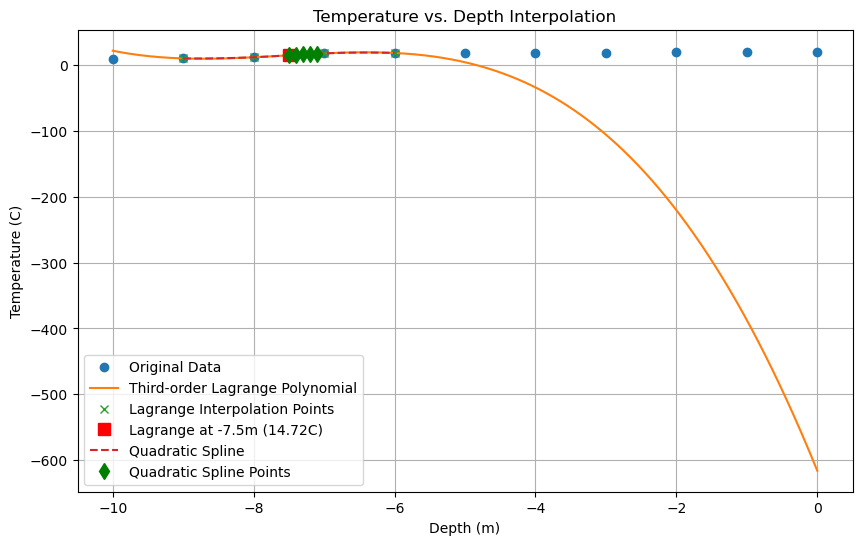


--- Problem 2: Cam Profile Analysis ---

Discussion for Problem 2:
This problem involves fitting a curve to discrete points to define a cam's geometry for fabrication. We will compare quadratic splines, linear splines, and a third-order polynomial to see how each method represents the cam's profile.

(a) Cam profile using quadratic splines generated.
(b) Comparing and graphing the profiles of quadratic spline, linear spline, and third-order polynomial.


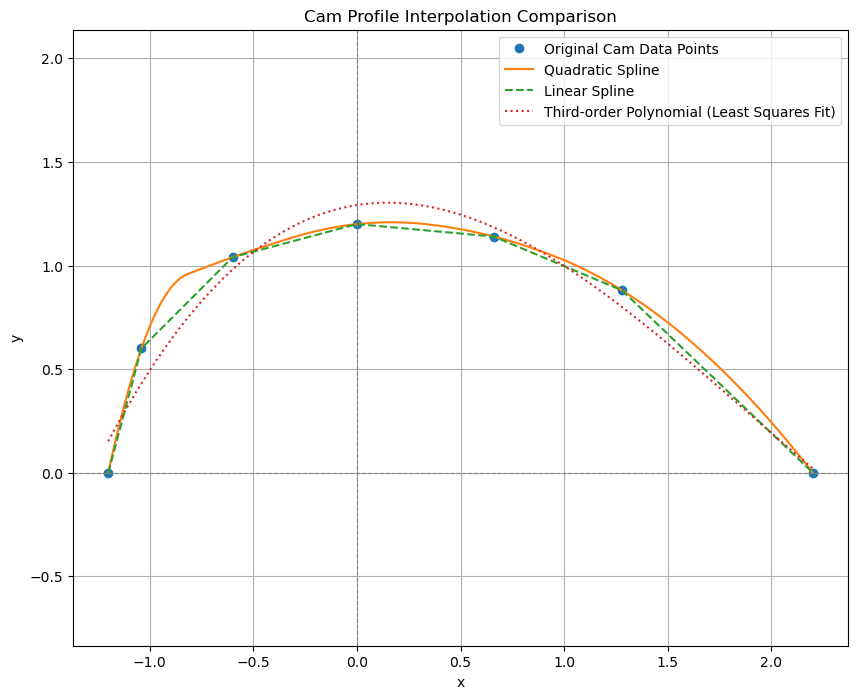


--- Problem 3: Concrete Compressive Strength Analysis ---

Discussion for Problem 3:
This problem focuses on predicting concrete compressive strength at various ages and determining its rate of change. We will use two interpolation techniques: the direct cubic method (a single cubic polynomial) and Newton's divided difference method, which should yield identical results for a unique cubic fit to four points.

(a) Compressive strength using Direct Cubic Method:
Strength at Day 5: 7.0496 MPa
Strength at Day 20: 22.7676 MPa
Strength at Day 50: 16.6627 MPa
Strength at Day 79: 17.7266 MPa

Compressive strength using Newton's Divided Difference Method:
Strength at Day 5: 7.0496 MPa
Strength at Day 20: 22.7676 MPa
Strength at Day 50: 16.6627 MPa
Strength at Day 79: 17.7266 MPa

(b) Rate of change of strength (d(Strength)/d(Age)) using Direct Cubic Method:
Rate of change at Day 5: 1.7558 MPa/day
Rate of change at Day 20: 0.4369 MPa/day
Rate of change at Day 50: -0.4562 MPa/day
Rate of change 

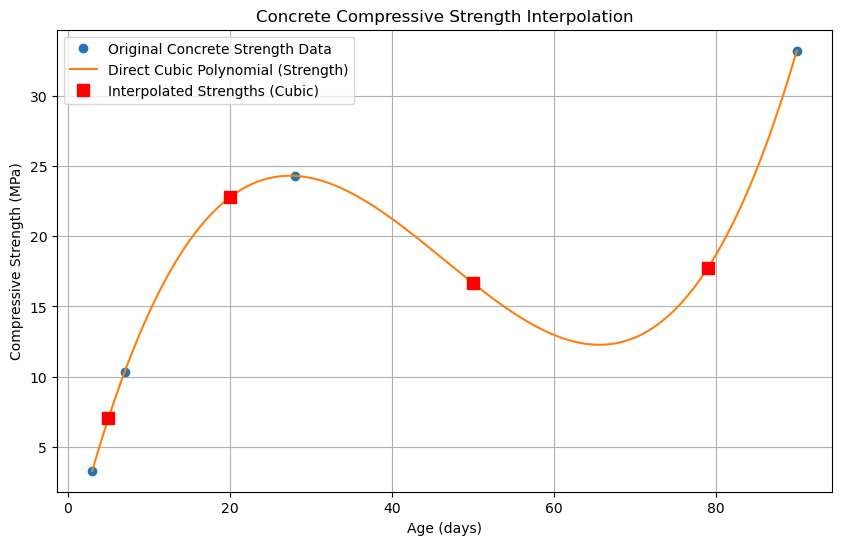

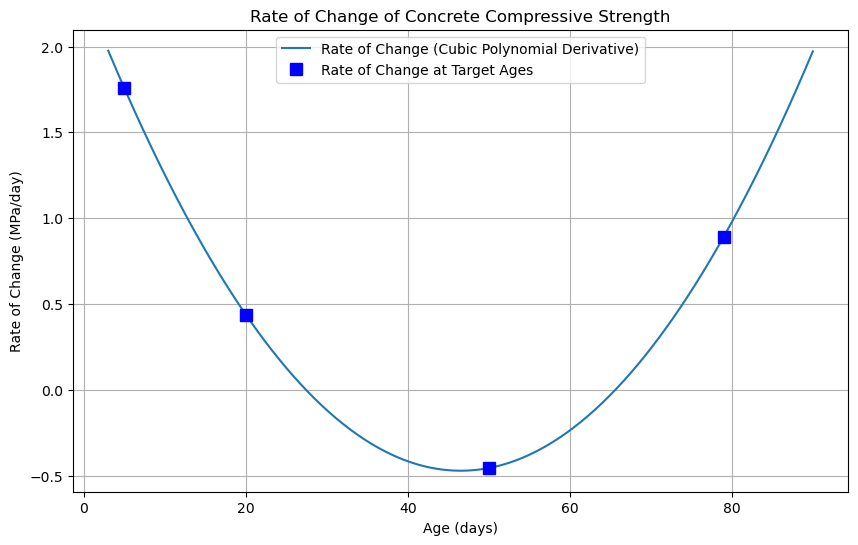

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline

# --- Problem 1: Lake Temperature and Thermocline Analysis ---
print("--- Problem 1: Lake Temperature and Thermocline Analysis ---")

# Data from Table 1
depth = np.array([0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10]) # Depth values
temperature = np.array([19.1, 19.1, 19.0, 18.8, 18.7, 18.3, 18.2, 17.6, 11.7, 9.9, 9.1]) # Temperature values

# Discussion for Problem 1:
print("\nDiscussion for Problem 1:")
print("This problem focuses on interpolating lake temperature data at various depths to understand thermal characteristics like the thermocline. Numerical methods such as Lagrange polynomials and quadratic splines are employed for this purpose.")
print("The thermocline, characterized by a sudden temperature change, is identified where the second derivative of temperature with respect to depth is zero.")

# Part (a): Third Order Lagrange Polynomial for Temperature at z = -7.5 m

# Select data points around z = -7.5 m for third-order Lagrange interpolation.
# We will use points at z = -6, -7, -8, -9 as they bracket the target and show the largest temperature change.
z_lagrange = np.array([-6, -7, -8, -9])
temp_lagrange = np.array([18.2, 17.6, 11.7, 9.9])

def lagrange_interpolation(x_points, y_points, x_interp):
    """
    Calculates the interpolated value at x_interp using Lagrange polynomial.
    """
    n = len(x_points)
    L = np.zeros(n)
    for j in range(n):
        term = 1
        for k in range(n):
            if k != j:
                term *= (x_interp - x_points[k]) / (x_points[j] - x_points[k])
        L[j] = term
    return np.dot(L, y_points)

z_target_lagrange = -7.5 # Target depth for interpolation
temp_at_z_minus_7_5_lagrange = lagrange_interpolation(z_lagrange, temp_lagrange, z_target_lagrange)
print(f"\n(a) Temperature at z = {z_target_lagrange} m using third-order Lagrange polynomial: {temp_at_z_minus_7_5_lagrange:.4f} C")

# For absolute relative approximate error, we compare the third-order to a second-order approximation.
z_lagrange_2nd_order = np.array([-7, -8, -9])
temp_lagrange_2nd_order = np.array([17.6, 11.7, 9.9])
temp_at_z_minus_7_5_lagrange_2nd_order = lagrange_interpolation(z_lagrange_2nd_order, temp_lagrange_2nd_order, z_target_lagrange)

abs_rel_approx_error_lagrange = np.abs((temp_at_z_minus_7_5_lagrange - temp_at_z_minus_7_5_lagrange_2nd_order) / temp_at_z_minus_7_5_lagrange) * 100
print(f"Absolute relative approximate error for the third-order Lagrange polynomial (compared to 2nd order): {abs_rel_approx_error_lagrange:.4f}%")


# Part (b): Determine the value of the depth at which the thermocline exists where d^2T/dz^2 = 0.

# We use numpy.polyfit to get the coefficients of the cubic polynomial that exactly passes through the chosen Lagrange points.
# This allows for straightforward differentiation to find the second derivative.
coefficients_lagrange = np.polyfit(z_lagrange, temp_lagrange, 3) # Coefficients [a, b, c, d] for a*z^3 + b*z^2 + c*z + d

# Second derivative T''(z) = 6*a*z + 2*b. Setting T''(z) = 0 gives z = -2*b / (6*a) = -b / (3*a).
if coefficients_lagrange[0] != 0:
    depth_thermocline = -coefficients_lagrange[1] / (3 * coefficients_lagrange[0])
    print(f"\n(b) Depth at which the thermocline exists (d^2T/dz^2 = 0) using the third-order Lagrange polynomial: {depth_thermocline:.4f} m")
else:
    print("\n(b) Cannot determine thermocline depth from second derivative as the leading coefficient (a) is zero, indicating a lower-order polynomial.")


# Part (c): Determine the value of the temperature at z = -7.1, -7.2, -7.3, -7.4 and -7.5 m using quadratic splines.
# Find the absolute relative approximate error for the second order approximation.

# Quadratic splines use piecewise quadratic polynomials to interpolate, providing a smoother curve than linear interpolation.
# We use scipy's interp1d with 'quadratic' kind for this purpose.
z_spline_full_range = np.array([-9, -8, -7, -6]) # Ordered for interp1d
temp_spline_full_range = np.array([9.9, 11.7, 17.6, 18.2])

f_quadratic_spline = interp1d(z_spline_full_range, temp_spline_full_range, kind='quadratic')

z_target_spline = np.array([-7.1, -7.2, -7.3, -7.4, -7.5]) # Target depths
temp_at_z_spline = f_quadratic_spline(z_target_spline)

print("\n(c) Temperature values using quadratic splines:")
for i, z_val in enumerate(z_target_spline):
    print(f"Temperature at z = {z_val} m: {temp_at_z_spline[i]:.4f} C")

# For absolute relative approximate error of the quadratic spline, we compare it to a linear spline at z = -7.5 m.
temp_spline_at_minus_7_5 = temp_at_z_spline[-1]
f_linear_spline = interp1d(z_spline_full_range, temp_spline_full_range, kind='linear')
temp_at_z_minus_7_5_linear_spline = f_linear_spline(z_target_spline[-1])

abs_rel_approx_error_spline_vs_linear = np.abs((temp_spline_at_minus_7_5 - temp_at_z_minus_7_5_linear_spline) / temp_spline_at_minus_7_5) * 100
print(f"Absolute relative approximate error for quadratic spline at z = -7.5 m (compared to linear spline): {abs_rel_approx_error_spline_vs_linear:.4f}%")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(depth, temperature, 'o', label='Original Data')
z_smooth = np.linspace(depth.min(), depth.max(), 500) # Full range for overall plot and Lagrange

P3 = np.poly1d(coefficients_lagrange)
plt.plot(z_smooth, P3(z_smooth), '-', label='Third-order Lagrange Polynomial')
plt.plot(z_lagrange, temp_lagrange, 'x', label='Lagrange Interpolation Points')
plt.plot(z_target_lagrange, temp_at_z_minus_7_5_lagrange, 's', color='red', markersize=8, label=f'Lagrange at -7.5m ({temp_at_z_minus_7_5_lagrange:.2f}C)')

# Create a separate z_smooth for the quadratic spline, limited to its interpolation range
z_smooth_quadratic_spline = np.linspace(z_spline_full_range.min(), z_spline_full_range.max(), 100)
plt.plot(z_smooth_quadratic_spline, f_quadratic_spline(z_smooth_quadratic_spline), '--', label='Quadratic Spline')
plt.plot(z_target_spline, temp_at_z_spline, 'd', color='green', markersize=8, label='Quadratic Spline Points')


plt.xlabel('Depth (m)')
plt.ylabel('Temperature (C)')
plt.title('Temperature vs. Depth Interpolation')
plt.grid(True)
plt.legend()
plt.show()

# --- Problem 2: Cam Profile ---
print("\n--- Problem 2: Cam Profile Analysis ---")

# Data from Table 2
x_cam = np.array([2.20, 1.28, 0.66, 0.00, -0.60, -1.04, -1.20]) # x-coordinates
y_cam = np.array([0.00, 0.88, 1.14, 1.20, 1.04, 0.60, 0.00]) # y-coordinates

# Discussion for Problem 2:
print("\nDiscussion for Problem 2:")
print("This problem involves fitting a curve to discrete points to define a cam's geometry for fabrication. We will compare quadratic splines, linear splines, and a third-order polynomial to see how each method represents the cam's profile.")

# Ensure x_cam is sorted for interp1d
sorted_indices = np.argsort(x_cam)
x_cam_sorted = x_cam[sorted_indices]
y_cam_sorted = y_cam[sorted_indices]

# Part (a): Find the cam profile using quadratic splines
# Quadratic splines are used to create a smooth, continuous curve that passes through the given cam points.
f_quadratic_spline_cam = interp1d(x_cam_sorted, y_cam_sorted, kind='quadratic')

# Generate points for plotting the spline
x_cam_smooth = np.linspace(x_cam_sorted.min(), x_cam_sorted.max(), 500)
y_quadratic_spline_cam = f_quadratic_spline_cam(x_cam_smooth)

print("\n(a) Cam profile using quadratic splines generated.")


# Part (b): Compare and graph the profile with the linear spline and a third order polynomial result

# Linear Spline: Provides a simple, piece-wise linear approximation of the cam profile.
f_linear_spline_cam = interp1d(x_cam_sorted, y_cam_sorted, kind='linear')
y_linear_spline_cam = f_linear_spline_cam(x_cam_smooth)

# Third-order Polynomial: A single polynomial fitted to all data points using least squares.
coefficients_poly_cam = np.polyfit(x_cam_sorted, y_cam_sorted, 3)
poly_cam = np.poly1d(coefficients_poly_cam)
y_third_order_poly_cam = poly_cam(x_cam_smooth)

print("(b) Comparing and graphing the profiles of quadratic spline, linear spline, and third-order polynomial.")

plt.figure(figsize=(10, 8))
plt.plot(x_cam, y_cam, 'o', label='Original Cam Data Points')
plt.plot(x_cam_smooth, y_quadratic_spline_cam, '-', label='Quadratic Spline')
plt.plot(x_cam_smooth, y_linear_spline_cam, '--', label='Linear Spline')
plt.plot(x_cam_smooth, y_third_order_poly_cam, ':', label='Third-order Polynomial (Least Squares Fit)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Cam Profile Interpolation Comparison')
plt.grid(True)
plt.legend()
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axis('equal') # Maintain aspect ratio for accurate cam visualization
plt.show()

# --- Problem 3: Concrete Compressive Strength ---
print("\n--- Problem 3: Concrete Compressive Strength Analysis ---")

# Data for concrete compressive strength
age = np.array([3, 7, 28, 90]) # Age in days
strength = np.array([3.32, 10.35, 24.29, 33.19]) # Compressive strength in MPa

# Target ages for interpolation and differentiation
target_ages = np.array([5, 20, 50, 79])

# Discussion for Problem 3:
print("\nDiscussion for Problem 3:")
print("This problem focuses on predicting concrete compressive strength at various ages and determining its rate of change. We will use two interpolation techniques: the direct cubic method (a single cubic polynomial) and Newton's divided difference method, which should yield identical results for a unique cubic fit to four points.")

# Part (a): Determine the compressive strength at day 5, 20, 50, and 79

# Method 1: Direct Cubic Method (using numpy.polyfit for a single cubic polynomial)
# With exactly four data points, a unique cubic polynomial can be found that passes through all of them.
coefficients_cubic = np.polyfit(age, strength, 3)
poly_cubic_direct = np.poly1d(coefficients_cubic)

strength_cubic_direct = poly_cubic_direct(target_ages)

print("\n(a) Compressive strength using Direct Cubic Method:")
for i, age_val in enumerate(target_ages):
    print(f"Strength at Day {age_val}: {strength_cubic_direct[i]:.4f} MPa")

# Method 2: Newton's Divided Difference Method
def newton_divided_diff(x_points, y_points):
    """
    Calculates the divided differences table for Newton's interpolation.
    """
    n = len(x_points)
    divided_diff_table = np.zeros((n, n))
    divided_diff_table[:, 0] = y_points

    for j in range(1, n):
        for i in range(n - j):
            divided_diff_table[i, j] = (divided_diff_table[i+1, j-1] - divided_diff_table[i, j-1]) / (x_points[i+j] - x_points[i])
    return divided_diff_table[0, :]

def evaluate_newton_poly(x_points, divided_diffs, x_interp):
    """
    Evaluates Newton's interpolating polynomial at x_interp.
    """
    n = len(x_points)
    poly_val = divided_diffs[0]
    for i in range(1, n):
        term = divided_diffs[i]
        for j in range(i):
            term *= (x_interp - x_points[j])
        poly_val += term
    return poly_val

# Calculate divided differences and evaluate for target ages.
div_diffs = newton_divided_diff(age, strength)
strength_newton = np.array([evaluate_newton_poly(age, div_diffs, a) for a in target_ages])

print("\nCompressive strength using Newton's Divided Difference Method:")
for i, age_val in enumerate(target_ages):
    print(f"Strength at Day {age_val}: {strength_newton[i]:.4f} MPa")


# Part (b): What is the rate of change of the strength of the concrete with respect to age at day 5, 20, 50, and 79?

# For the Direct Cubic Method, we differentiate the polynomial object directly.
derivative_poly_cubic_direct = poly_cubic_direct.deriv()
rate_of_change_cubic_direct = derivative_poly_cubic_direct(target_ages)

print("\n(b) Rate of change of strength (d(Strength)/d(Age)) using Direct Cubic Method:")
for i, age_val in enumerate(target_ages):
    print(f"Rate of change at Day {age_val}: {rate_of_change_cubic_direct[i]:.4f} MPa/day")

# For Newton's Divided Difference Method, we manually define its derivative.
def differentiate_newton_poly(x_points, divided_diffs, x_interp):
    """
    Calculates the first derivative of Newton's interpolating polynomial at x_interp.
    """
    n = len(x_points)
    derivative_val = 0

    # Derivative of f[x0,x1](x-x0) is f[x0,x1]
    if n > 1:
        derivative_val += divided_diffs[1]

    # Derivative of f[x0,x1,x2](x-x0)(x-x1) is f[x0,x1,x2] * ((x-x1) + (x-x0))
    if n > 2:
        derivative_val += divided_diffs[2] * ((x_interp - x_points[1]) + (x_interp - x_points[0]))

    # Derivative of f[x0,x1,x2,x3](x-x0)(x-x1)(x-x2)
    # is f[x0,x1,x2,x3] * ((x-x1)(x-x2) + (x-x0)(x-x2) + (x-x0)(x-x1))
    if n > 3:
        derivative_val += divided_diffs[3] * (
            (x_interp - x_points[1]) * (x_interp - x_points[2]) +
            (x_interp - x_points[0]) * (x_interp - x_points[2]) +
            (x_interp - x_points[0]) * (x_interp - x_points[1])
        )
    return derivative_val

rate_of_change_newton = np.array([differentiate_newton_poly(age, div_diffs, a) for a in target_ages])

print("Rate of change of strength (d(Strength)/d(Age)) using Newton's Divided Difference Method:")
for i, age_val in enumerate(target_ages):
    print(f"Rate of change at Day {age_val}: {rate_of_change_newton[i]:.4f} MPa/day")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(age, strength, 'o', label='Original Concrete Strength Data')

age_smooth_strength = np.linspace(min(age), max(age), 500)

plt.plot(age_smooth_strength, poly_cubic_direct(age_smooth_strength), '-', label='Direct Cubic Polynomial (Strength)')
plt.plot(target_ages, strength_cubic_direct, 's', color='red', markersize=8, label='Interpolated Strengths (Cubic)')

plt.xlabel('Age (days)')
plt.ylabel('Compressive Strength (MPa)')
plt.title('Concrete Compressive Strength Interpolation')
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(age_smooth_strength, derivative_poly_cubic_direct(age_smooth_strength), '-', label='Rate of Change (Cubic Polynomial Derivative)')
plt.plot(target_ages, rate_of_change_cubic_direct, 's', color='blue', markersize=8, label='Rate of Change at Target Ages')

plt.xlabel('Age (days)')
plt.ylabel('Rate of Change (MPa/day)')
plt.title('Rate of Change of Concrete Compressive Strength')
plt.grid(True)
plt.legend()
plt.show()